# Capstone Project EDA
## The 2016-2017 NBA Season

What's another disappointing season for an NBA squad? The staff and players still get paid. The draft will roll around soon and before you know it a whole new season will start, hopefully with a groundswell of support from the fans.  

From the outside looking in, this oversimplification is indeed how it appears. Life goes on, win or lose, for the fans and the players. After all, only so much blame for a disastrous season can go to the players themselves - they aren't the ones responsible for building the team and designing strategies. The team executives are, and to them winning and losing is of vital importance. Jobs are on the line every day for the coaches, scouts, video analysts, and executives who shape the makeup of their team. 

Identifying exactly what sets the winning teams apart from the losing teams and providing concrete examples of what needs to change could impact an organization at every level. Based on the results of an analysis you could tell an individual player to shoot more corner 3's, provide the coach with information that could help design higher-percentage plays, and assist the executives with finding players that fit the new plan.

This project will explore those questions and more, providing answers that would hopefully prove useful to an NBA team, or at least provide avenues that would be worth further investigation. For example, if a metric identifies a player on another team as above average in a certain category than more detailed analysis might be warranted to see if that player is worth pursuing in a trade or through free agency.

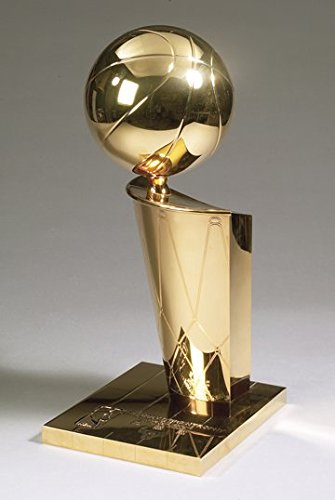

In [2]:
from IPython.display import Image

Image("trophy.jpg")

## My Perspective on the NBA and Basketball

I love basketball, have since I was a little kid. I grew up playing basketball and also going to Sacramento Kings games with my family. The feeling when a whole city rallies around their team is a special one that might be unique to professional sports. 

I am by no means an expert on the x's-and-o's of drawing up plays but I have formulated some opinions on how I think the game should be played. Basketball is first and foremost a team game. Crisp, fast passes on offense create open looks and driving lanes that the more isolation-focused teams struggle to emulate. On defense, the squad must communicate and be aware of what is happening around them. They have to help each other cover weaknesses and prevent those passes from opening the court up too much. 

The Golden State Warriors are a prime example. The 2016-2017 team was one of the best NBA teams ever. They pass the ball on offense and routinely get open looks. None of their players are particularly good individual defenders, but together they can get stops when they need to. I will draw attention to the Warriors in this exploration when their stats are noteworthy. I think most if not all teams could implement some of what the Warriors do, to improve their own play.

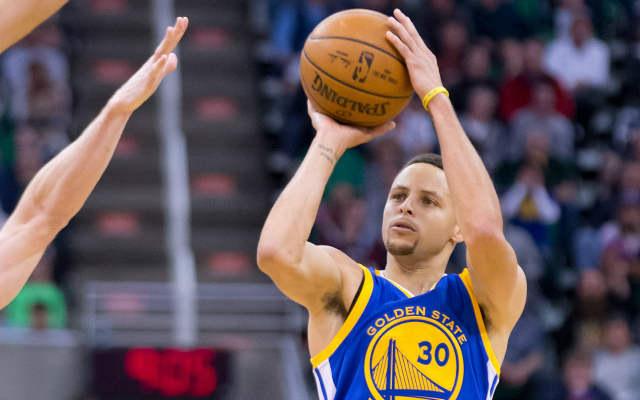

In [3]:
from IPython.display import Image

Image("curry.jpg")

### 1. Getting to know the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

The first dataset contains team boxscores from every game. Lets quickly take a look at what it holds and a few plots.

In [66]:
tbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/team_box_score_cleaned.csv')

In [67]:
pd.set_option('display.max_columns', 60)
tbsdf.head()

,DATE,TEAMS,VENUE,1Q,2Q,3Q,4Q,OT1,OT2,OT3,OT4,F,MIN,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO,TO TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,STARTING LINEUPS1,STARTING LINEUPS2,STARTING LINEUPS3,STARTING LINEUPS4,STARTING LINEUPS5
0,2016-10-25,New York,Road,18,27,19,24,NaN,NaN,NaN,NaN,88,240,32,87,9,27,15,20,13,29,42,17,22,6,18,18,6,88,100.4,100.4,87.7,116.6,3+,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose
1,2016-10-25,Cleveland,Home,28,20,34,35,NaN,NaN,NaN,NaN,117,240,45,94,13,35,14,19,11,40,51,31,22,12,14,15,5,117,100.4,100.4,116.6,87.7,3+,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving
2,2016-10-25,Utah,Road,26,20,37,21,NaN,NaN,NaN,NaN,104,240,40,82,8,24,16,16,6,25,31,19,19,9,11,14,5,104,92.5,92.5,112.4,122.1,3+,Joe Johnson,Boris Diaw,Rudy Gobert,Rodney Hood,George Hill
3,2016-10-25,Portland,Home,26,28,23,36,NaN,NaN,NaN,NaN,113,240,39,75,13,19,22,22,5,29,34,22,18,5,12,13,3,113,92.5,92.5,122.1,112.4,3+,Maurice Harkless,Al-Farouq Aminu,Mason Plumlee,CJ McCollum,Damian Lillard
4,2016-10-25,San Antonio,Road,31,33,33,32,NaN,NaN,NaN,NaN,129,240,47,98,12,24,23,26,21,34,55,25,19,13,13,14,3,129,98.8,98.8,130.6,101.2,3+,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker


In [72]:
# add opponent scores to each row
tbsdf.loc[tbsdf['VENUE']=='Road', 'oppscore'] = tbsdf['F'].shift(-1)
tbsdf.loc[tbsdf['VENUE']=='Home', 'oppscore'] = tbsdf['F'].shift(1)

# function to do simple comparison of scores
def win_or_loss(row):
    if row['F'] > row['oppscore']:
        return 1
    else:
        return 0

tbsdf['win_or_loss'] = tbsdf.apply(win_or_loss, axis=1)

tbsdf['win_or_loss'].groupby(tbsdf['TEAMS']).sum().sort_values(ascending=False)

TEAMS
Golden State     67
San Antonio      61
Houston          55
Boston           53
Utah             51
Toronto          51
Cleveland        51
LA Clippers      51
Washington       49
Oklahoma City    47
Memphis          43
Atlanta          43
Milwaukee        42
Indiana          42
Miami            41
Chicago          41
Portland         41
Denver           40
Detroit          37
Charlotte        36
New Orleans      34
Dallas           33
Sacramento       32
Minnesota        31
New York         31
Orlando          29
Philadelphia     28
LA Lakers        26
Phoenix          24
Brooklyn         20
Name: win_or_loss, dtype: int64